## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[28, 36, 91],
       [ 8, 24, 53],
       [23, 84, 98],
       [12, 42, 45],
       [21, 46, 87],
       [10, 48, 73]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([28, 36, 91]), array([ 8, 24, 53]))

The lowest card in the game is

In [5]:
np.min(cards)

8

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

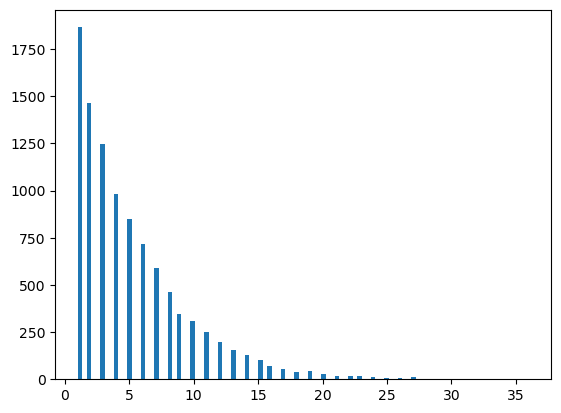

In [7]:
minHist = []
for i in range(10000):
    cards = sample_cards(100,6,3)
    minHist.append(np.min(cards))
plt.hist(minHist, bins = 100);
    

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

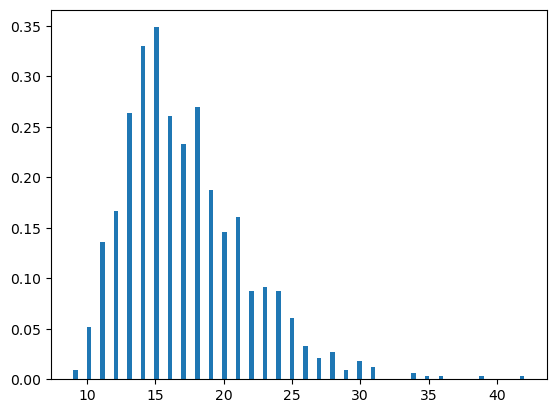

In [46]:
def getSamples(rep,N,n,k):
    maxDistHist = []
    for i in range(rep):
        cards = sample_cards(N,n,k)
        sorted_allcards = np.sort(cards.reshape(1,n*k))[0]
        len(sorted_allcards)
        allDist = []
        for j in range(1,len(sorted_allcards)):
            allDist.append(sorted_allcards[j]- sorted_allcards[j-1])
        maxDistHist.append(np.max(allDist))
    return maxDistHist

    
plt.hist(getSamples(1000,100,6,3), bins = 100,density=True);

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

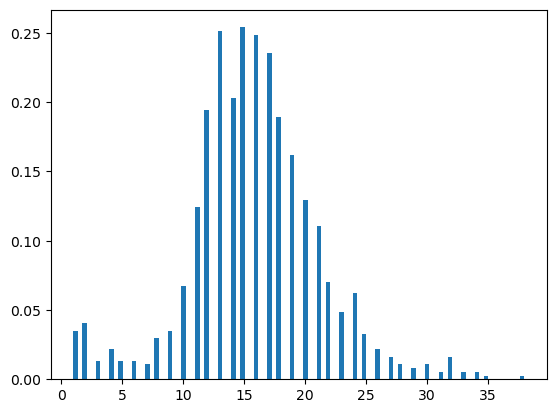

In [47]:
def getOneMax(cards,n,k):

    ownership = {}
    for i in range(cards.shape[0]):
        for j in range(cards.shape[1]):
            ownership[cards[i][j]] = i
        
    sorted_allcards = np.sort(cards.reshape(1,n*k))[0]
    len(sorted_allcards)
    allDist = []
    for j in range(1,len(sorted_allcards)):
        allDist.append(sorted_allcards[j]- sorted_allcards[j-1])

    return allDist[findMaxLoc(ownership, allDist, sorted_allcards)]


def findMaxLoc (ownership, allDist, allcards):
    maxloc = np.argmax(allDist)
    
    if ownership[allcards[maxloc]] == ownership[allcards[maxloc+1]]:
        maxloc = findMaxLoc(ownership, np.delete(allDist, np.argmax(allDist)), allcards)
        
    return maxloc



def getSamples_Diff(rep,N,n,k):
    
    maxDistHist_Diff = []
    for i in range(rep):
        cards = sample_cards(N,n,k)
        maxDistHist_Diff.append(getOneMax(cards,n,k))
    
    return maxDistHist_Diff
    
plt.hist(getSamples_Diff(1000,100,6,3), bins = 100,density=True);



How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

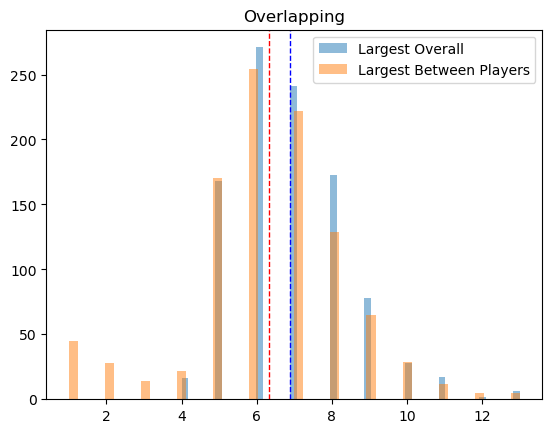

In [56]:
maxDistHist = getSamples(1000,100,5,10)
maxDistHist_Diff = getSamples_Diff(1000,100,5,10)

plt.hist(maxDistHist, 
         bins = 50,
         alpha = 0.5,
         label='Largest Overall')
plt.axvline(np.mean(maxDistHist), color='b', linestyle='dashed', linewidth=1)

plt.hist(maxDistHist_Diff, 
         bins = 50,
         alpha = 0.5,
         label='Largest Between Players')
plt.axvline(np.mean(maxDistHist_Diff), color='r', linestyle='dashed', linewidth=1)
  
plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

# The largest overall is higher than largest between players generally, when players number is low 
# and card number is high, the difference between those two are bigger, and vice versa. 
# As n increase and k decrease, the mean become closer, and vice versa.


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

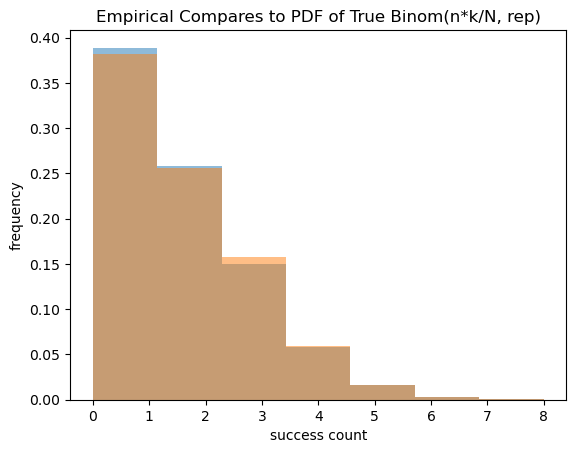

In [38]:
# We could easily find that the probability that one specific number got chosen in a game would follow binomial distribution with p=n*k/N and 
# with n = repitition of games. Without loss of generality, we choose this number to be 10, while it could be any number <= N
n=6
k=3
N=100
rep = 10

target_num = 10

# to get our empirical dist, we do 10000 trials of 10 games each, we collect the success amount in each trial to form an ecdf.
trial = 10000

ed = []
for i in range(trial):
    isin = []
    for j in range(rep):
        cards = sample_cards(N,n,k)
        if np.isin(target_num,cards):
            isin.append(1)
        else:
            isin.append(0)
    ed.append(sum(isin))

    

plt.hist(ed, density=True,bins = 7,histtype='bar', alpha =0.5);

# compare it with true binomial distribution:
dbinom = np.random.binomial(rep,n*k/N,size = trial)

plt.hist(dbinom, density=True,bins = 7,histtype='bar',alpha=0.5);
plt.xlabel('success count')
plt.ylabel('frequency')
plt.title('Empirical Compares to PDF of True Binom(n*k/N, rep)')
plt.show()

# We could see that they are pretty similar.

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

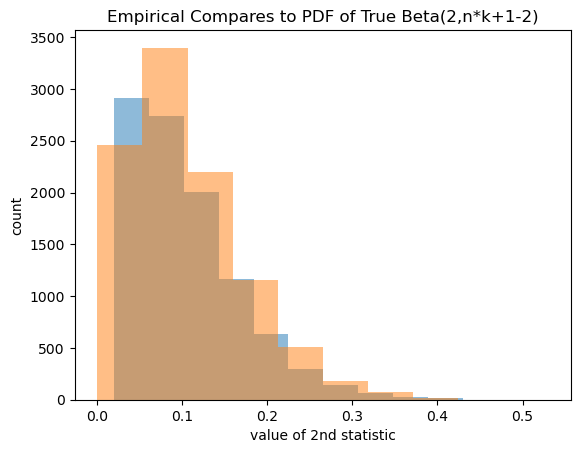

In [75]:
# We could see that sample n*k cards from a total of N is very similar to sample n*k real numbers from [0,1] if we divide each
# cards' value by N

# Now we try to simulate 2nd order statistic of n_1 uniformly distributed points in [0,1] by transforming our code form part 1:
# We could

n=6
k=3
N=100


#set trial to be 10000
trial = 10000

secstat = []
for i in range(trial):
    cards = sample_cards(N,n,k)
    # get the second lowest number divided by N:
    secstat.append(np.min(cards[cards != np.min(cards)])/N)
    

#now we find true beta distribution(2,n*k+1-2)
dbeta = np.random.beta(2,n*k+1-2,size = trial)

#if everything works well, we should have similar plot again:

plt.hist(secstat,histtype='bar', alpha =0.5);

plt.hist(dbeta,histtype='bar',alpha=0.5);

plt.xlabel('value of 2nd statistic')
plt.ylabel('count')
plt.title('Empirical Compares to PDF of True Beta(2,n*k+1-2)')
plt.show()
    
# they are similar.

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

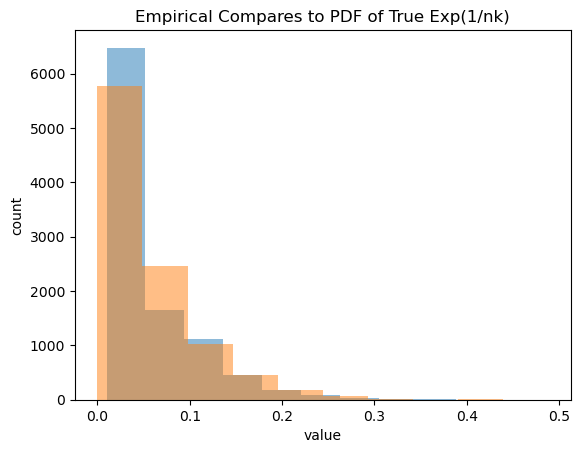

In [67]:
n=6
k=3
N=100

trial = 10000



trans_min = []

for i in range(trial):
    cards = sample_cards(N,n,k)
    trans_min_samp = -np.log(1-np.min(cards)/N)
    
    trans_min.append(trans_min_samp)
    
# get true exponential(nk)  
dexp = np.random.exponential(1/(n*k),size = trial)

# check similarity
plt.hist(trans_min,histtype='bar', alpha =0.5);

plt.hist(dexp,histtype='bar',alpha=0.5);

plt.xlabel('value')
plt.ylabel('count')
plt.title('Empirical Compares to PDF of True Exp(1/nk)')
plt.show()

#they are similar

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [72]:
#when n*k << N
n=6
k=3
N=1000

# write a new function to sample with reposition:
def sample_cards_rep(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

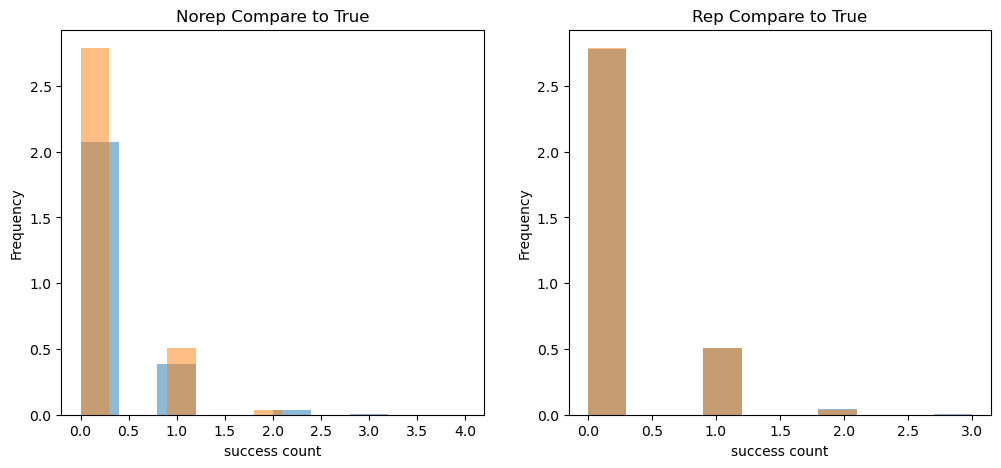

In [74]:
#when simulating binomial
target_num = 10
trial = 10000

# no rep:
ed = []
for i in range(trial):
    isin = []
    for j in range(rep):
        cards = sample_cards(N,n,k)
        if np.isin(target_num,cards):
            isin.append(1)
        else:
            isin.append(0)
    ed.append(sum(isin))


# with rep
ed_rep = []
for i in range(trial):
    isin = []
    for j in range(rep):
        cards = sample_cards_rep(N,n,k)
        if np.isin(target_num,cards):
            isin.append(1)
        else:
            isin.append(0)
    ed_rep.append(sum(isin))

# true binom
dbinom = np.random.binomial(rep,n*k/N,size = trial)

#plot to see the difference:    
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# the left histogram is no reposition
axes[0].hist(ed, density=True,histtype='bar', alpha =0.5);
axes[0].hist(dbinom, density=True,histtype='bar',alpha=0.5);
axes[0].set_xlabel('success count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Norep Compare to True')

axes[1].hist(ed_rep, density=True,histtype='bar', alpha =0.5);
axes[1].hist(dbinom, density=True,histtype='bar',alpha=0.5);
axes[1].set_xlabel('success count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Rep Compare to True')



plt.show()


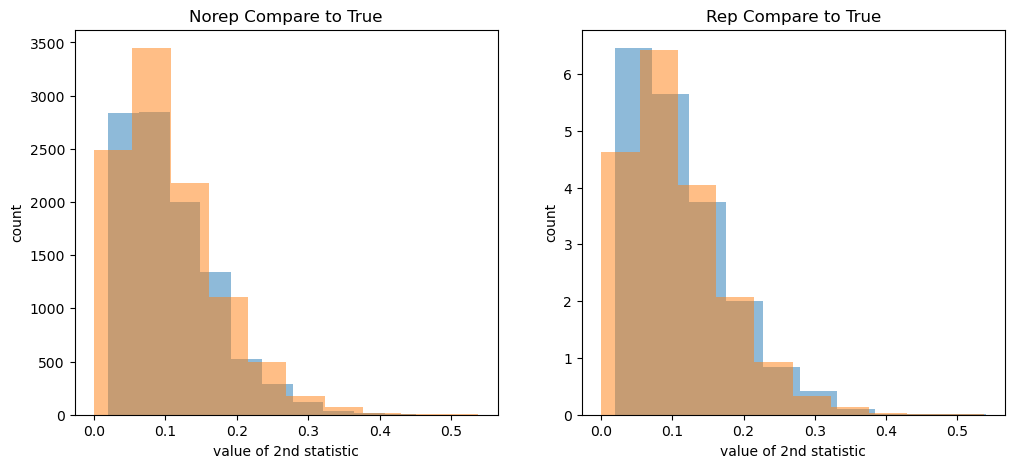

In [77]:

# When simulating Beta
trial = 10000

# No rep
secstat = []
for i in range(trial):
    cards = sample_cards(N,n,k)
    # get the second lowest number divided by N:
    secstat.append(np.min(cards[cards != np.min(cards)])/N)

# With rep
secstat_rep = []
for i in range(trial):
    cards = sample_cards_rep(N,n,k)
    # get the second lowest number divided by N:
    secstat_rep.append(np.min(cards[cards != np.min(cards)])/N)

#true beta
dbeta = np.random.beta(2,n*k+1-2,size = trial)


#plot to see the difference:    
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# the left histogram is no reposition
axes[0].hist(secstat,histtype='bar', alpha =0.5);
axes[0].hist(dbeta,histtype='bar',alpha=0.5);
axes[0].set_xlabel('value of 2nd statistic')
axes[0].set_ylabel('count')
axes[0].set_title('Norep Compare to True')

axes[1].hist(secstat_rep, density=True,histtype='bar', alpha =0.5);
axes[1].hist(dbeta, density=True,histtype='bar',alpha=0.5);
axes[1].set_xlabel('value of 2nd statistic')
axes[1].set_ylabel('count')
axes[1].set_title('Rep Compare to True')

plt.show()

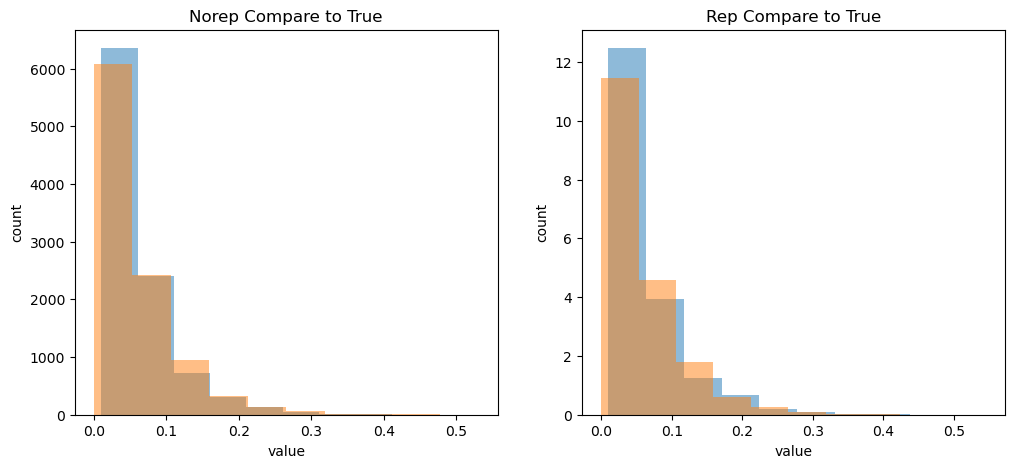

In [79]:
# when simulating exponential
trial = 10000

# No rep
trans_min = []

for i in range(trial):
    cards = sample_cards(N,n,k)
    trans_min_samp = -np.log(1-np.min(cards)/N)
    
    trans_min.append(trans_min_samp)

# Rep    
trans_min_rep = []

for i in range(trial):
    cards = sample_cards_rep(N,n,k)
    trans_min_samp = -np.log(1-np.min(cards)/N)
    
    trans_min_rep.append(trans_min_samp)


# get true exponential(nk)  
dexp = np.random.exponential(1/(n*k),size = trial)


#plot to see the difference:    
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# the left histogram is no reposition
axes[0].hist(trans_min,histtype='bar', alpha =0.5);
axes[0].hist(dexp, histtype='bar',alpha=0.5);
axes[0].set_xlabel('value')
axes[0].set_ylabel('count')
axes[0].set_title('Norep Compare to True')

axes[1].hist(trans_min_rep, density=True,histtype='bar', alpha =0.5);
axes[1].hist(dexp, density=True,histtype='bar',alpha=0.5);
axes[1].set_xlabel('value')
axes[1].set_ylabel('count')
axes[1].set_title('Rep Compare to True')

plt.show()

We could see that when nk << N, the method of sampling with reposition is better at simulating the true uniform and beta. But it does not perform better when simulating exponential. This is expected as sampling with reposition is exactly the way actual sampling would do in uniform, hence also in beta. But it doesn't make a lot of difference in exponential case.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Yilin Ni
- Member No2: 
- Member No3: